In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import power_transform
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection  import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("census_income.csv")

# EDA

In [3]:
df.shape

(32560, 15)

We have 32560 rows and 15 columns

In [4]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

Target Variable is highly unbalanced

In [6]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In Native_country column null value is present as '?'

In [7]:
df['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

No Invalid value is present in Relationship column

In [8]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In Occupation column null value is present as '?'

In [9]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In Marital_status column we dont have any invalid value

In [10]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In Education column we dont have any invalid value

In [11]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In Workclass column null value is present as '?'

In [12]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no null values available in the continous variables

In [13]:
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

24


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
4880,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5103,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9170,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11630,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13083,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15058,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17039,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18554,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18697,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21317,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


Duplicate rows are available in the dataset

In [14]:
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

Data is skewed

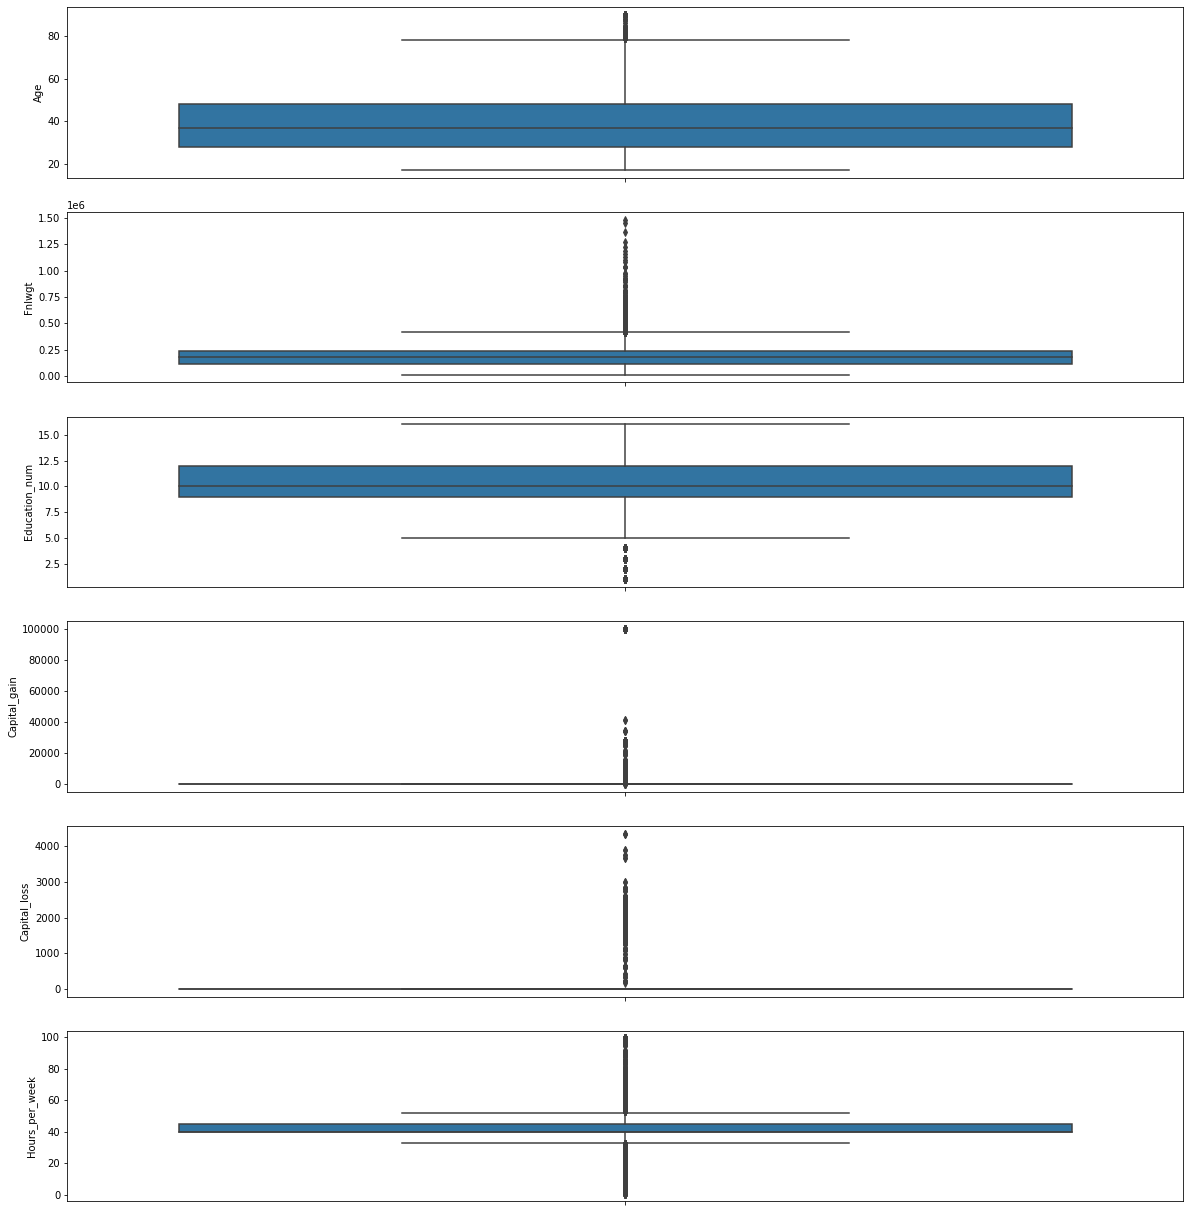

In [15]:

counter=1
plt.figure(figsize=(20,150))
columns = ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week']
counter=1;
for i in range(0,len(columns)):
        plt.subplot(40,1,counter)
        counter=counter+1
        sns.boxplot(y=columns[i],hue = columns[i],data=df)
        #sns.boxplot(df[columns[i]])

Outliers are present in 'Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week' columns

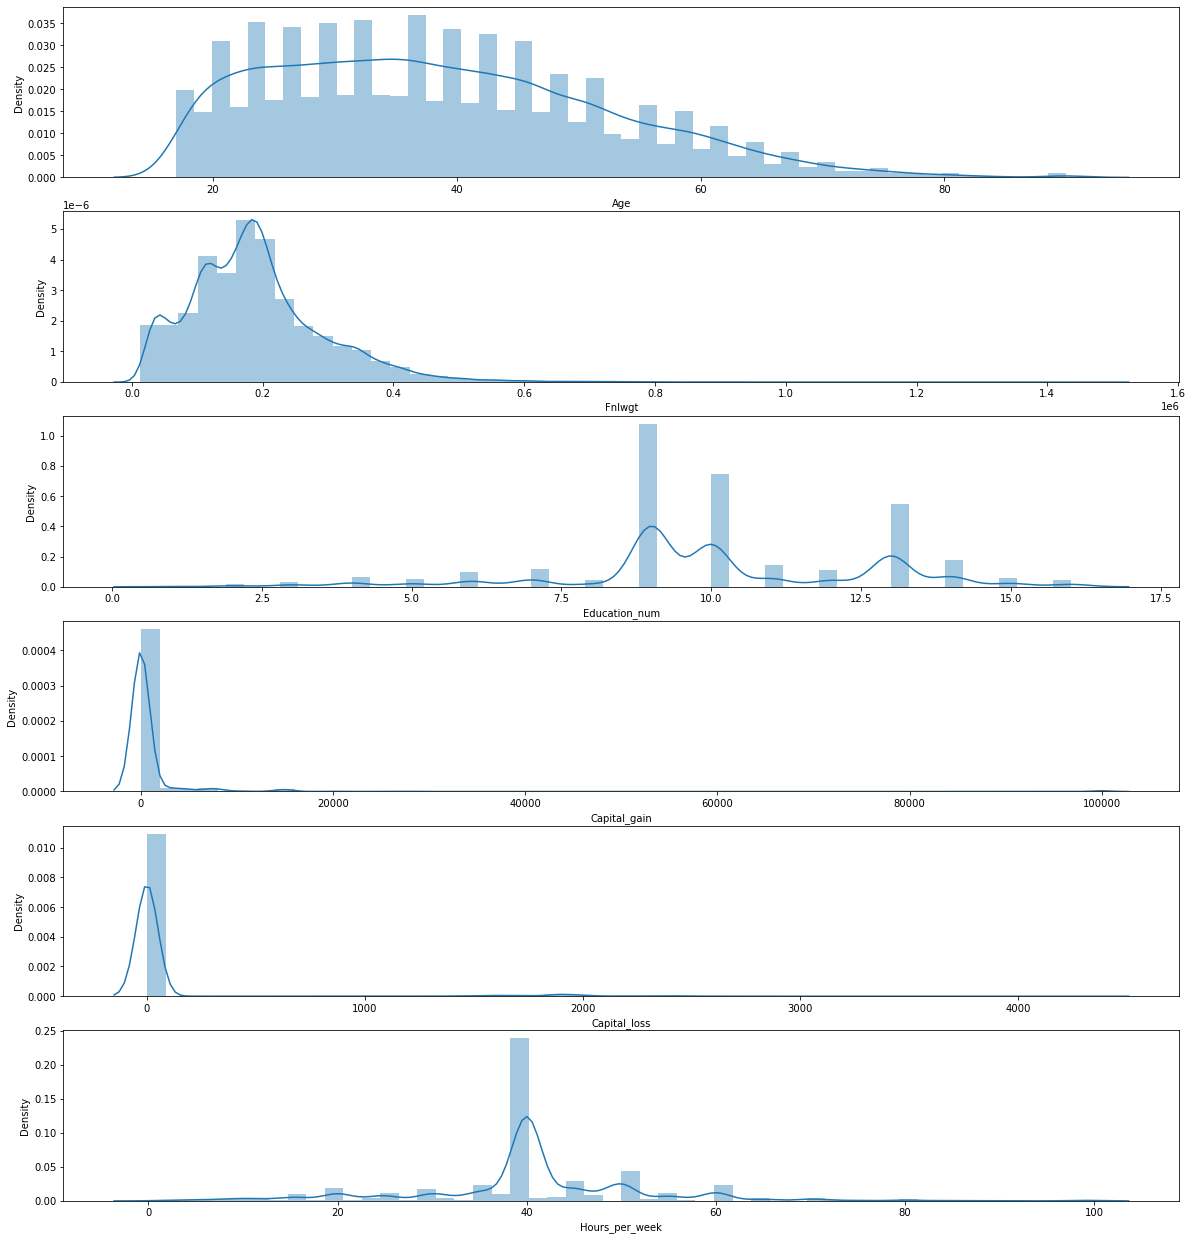

In [16]:

counter=1
plt.figure(figsize=(20,150))
columns =  ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week']
counter=1;
for i in range(0,len(columns)):
        plt.subplot(40,1,counter)
        counter=counter+1
        sns.distplot(df[columns[i]])

'Fnlwgt', 'Education_num', 'Hours_per_week' are not normally distributed

<AxesSubplot:>

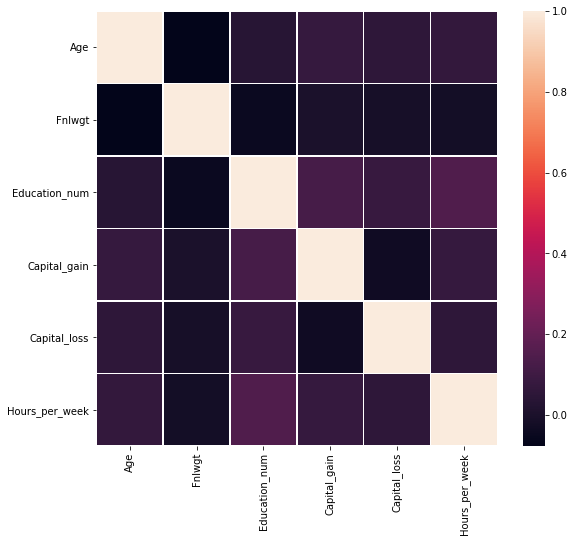

In [17]:
corrmat = df.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, linewidths = 0.1)

We can see that correlation is very week in all the columns

# Replacing '?' values with correct values in the columns->

In [18]:
df['Workclass']=df['Workclass'].str.replace('?',df['Workclass'].mode()[0].strip())
df['Occupation']=df['Occupation'].str.replace('?',df['Occupation'].mode()[0].strip())
df['Native_country']=df['Native_country'].str.replace('?',df['Native_country'].mode()[0].strip())

# Confirming the removal of '?'

In [19]:
df['Workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [20]:
df['Occupation'].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [21]:
df['Native_country'].value_counts()

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

'?' is successfully removed from all the columns

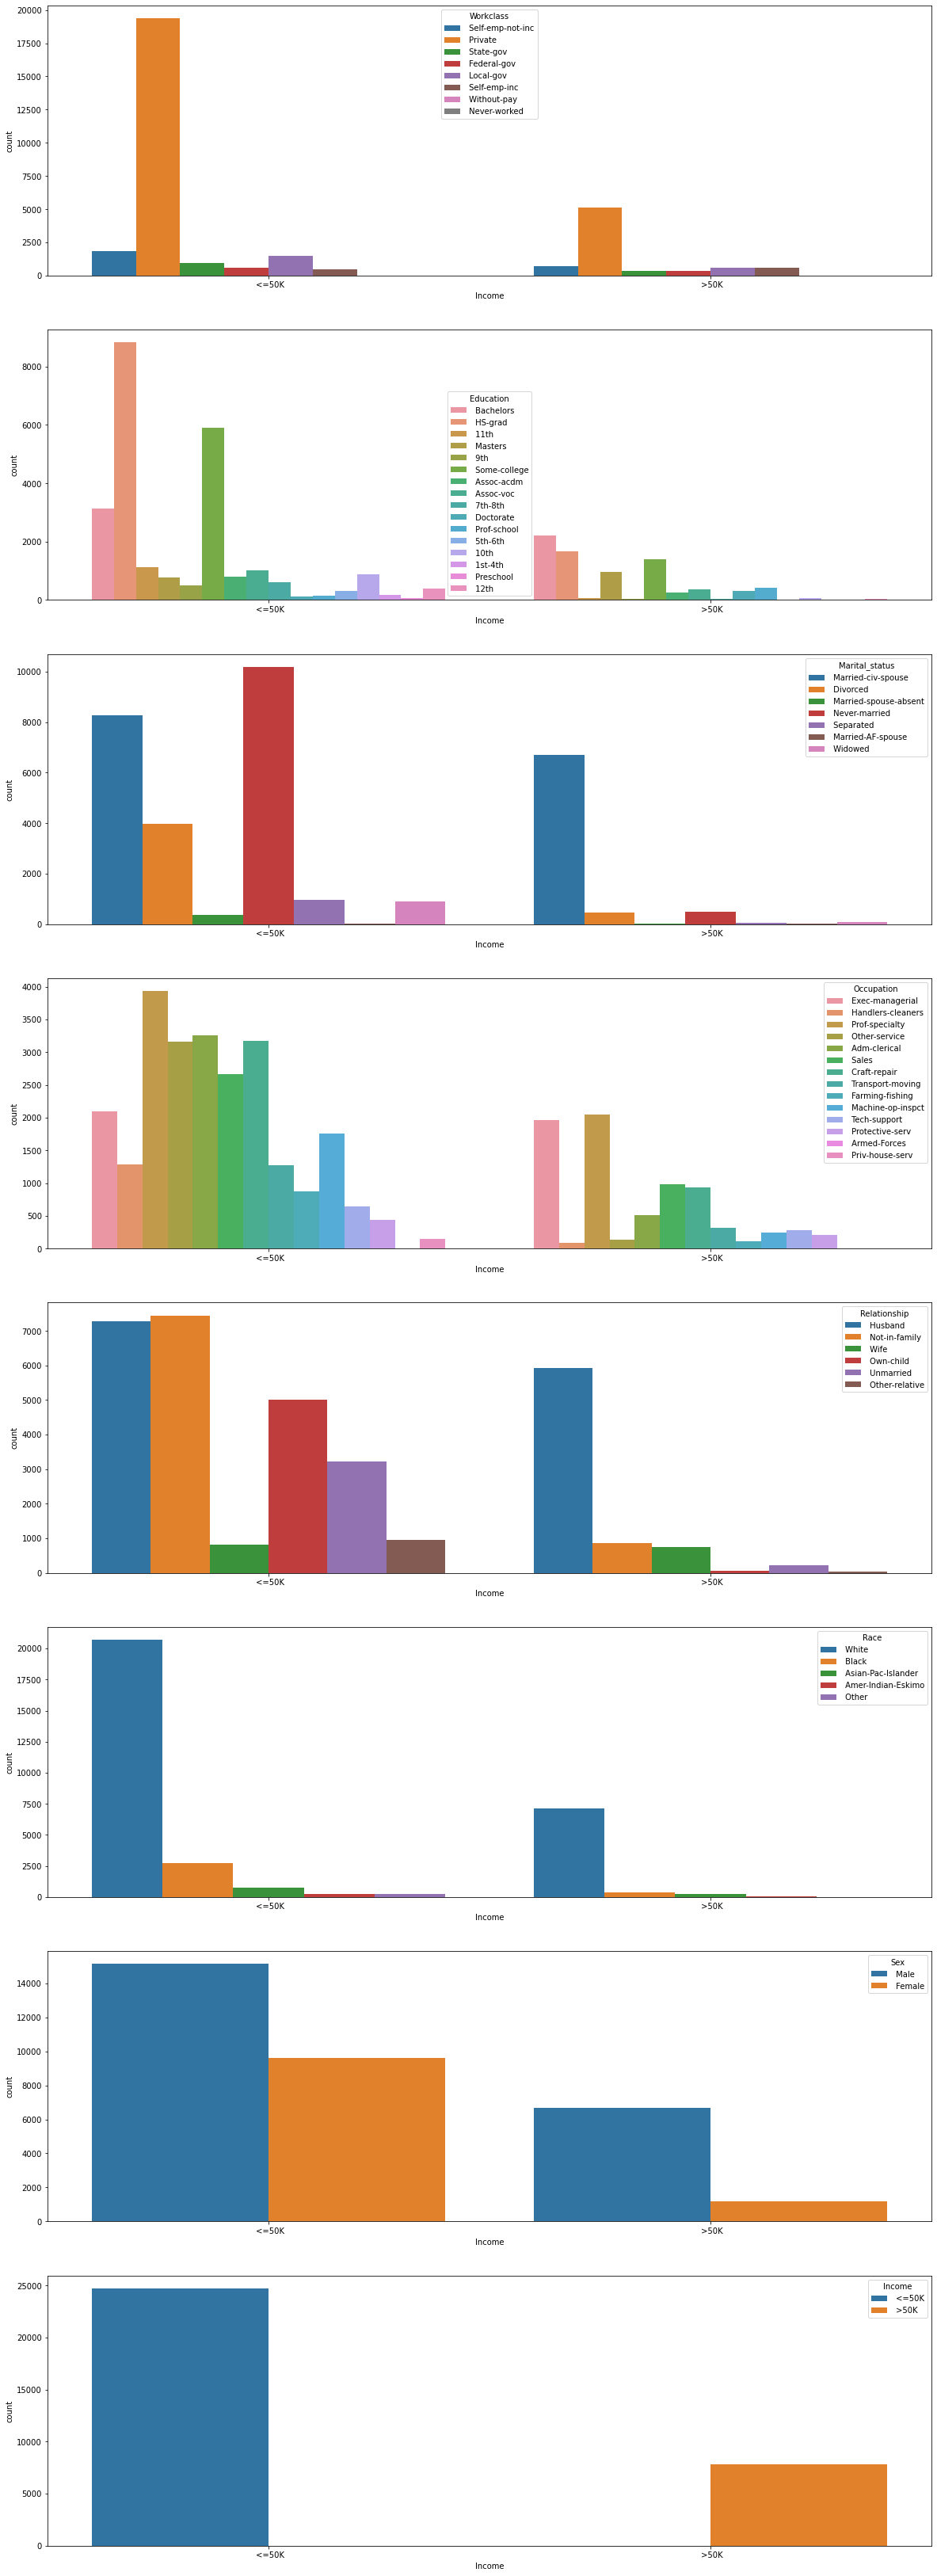

In [22]:
counter=1;
columns =['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex','Income']
plt.figure(figsize=(20,300))
for column in columns:
        plt.subplot(40,1,counter)
        counter=counter+1
        sns.countplot(x='Income',hue=column,data=df)

    We can observe -> 
        We can observe that Private Workclass have majorly Income <=50K
        We can observe that Education of HS-grad have majorly Income <=50K
        We can observe Married-civ-spouse have >50K Income as compared to other marital_status
        We can observe prof-speciality have <=50K majorly
        We can observe that Majority of the that Income earning relations are Husband
        We can observe that Majority of the that Income earning Race is of White
        We can observe that majority of Females have Income <=50K
        Data in Income is highly unbalanced

# Converting Income to Labels

In [23]:
df['Income']=df['Income'].str.replace('<=50K','0')
df['Income']=df['Income'].str.replace('>50K','1')

In [24]:

LE = LabelEncoder()
df['Income'] =  LE.fit_transform(df['Income'])

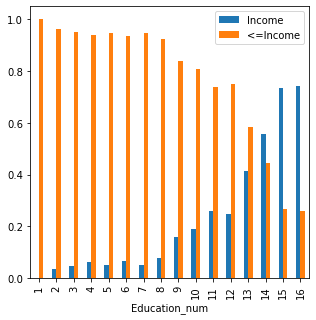

In [25]:
df['<=Income']=1-df['Income']
df.groupby('Education_num').agg('mean')[['Income', '<=Income']].plot(kind='bar', figsize=(5, 5));                                                       

We can observe that Education with 16 number are earning income >50K

# Converting catagorical variables into Labels

In [26]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex','Native_country']:
    df[col] =  LE.fit_transform(df[col])

In [27]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,<=Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0,1
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0,1
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0,1
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0,1
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0,1


# Removing Outliers

In [28]:
columns =  ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week']
for i in columns:
    IQR = df[i].quantile(0.75)-df[i].quantile(0.25)
    Barmax =  df[i].quantile(0.75) + 1.5*IQR
    Barmin =  df[i].quantile(0.25) - 1.5*IQR
    df.loc[df[i]>Barmax,i] = Barmax
    df.loc[df[i]<Barmin,i] = Barmin

# confirming removal of outliers

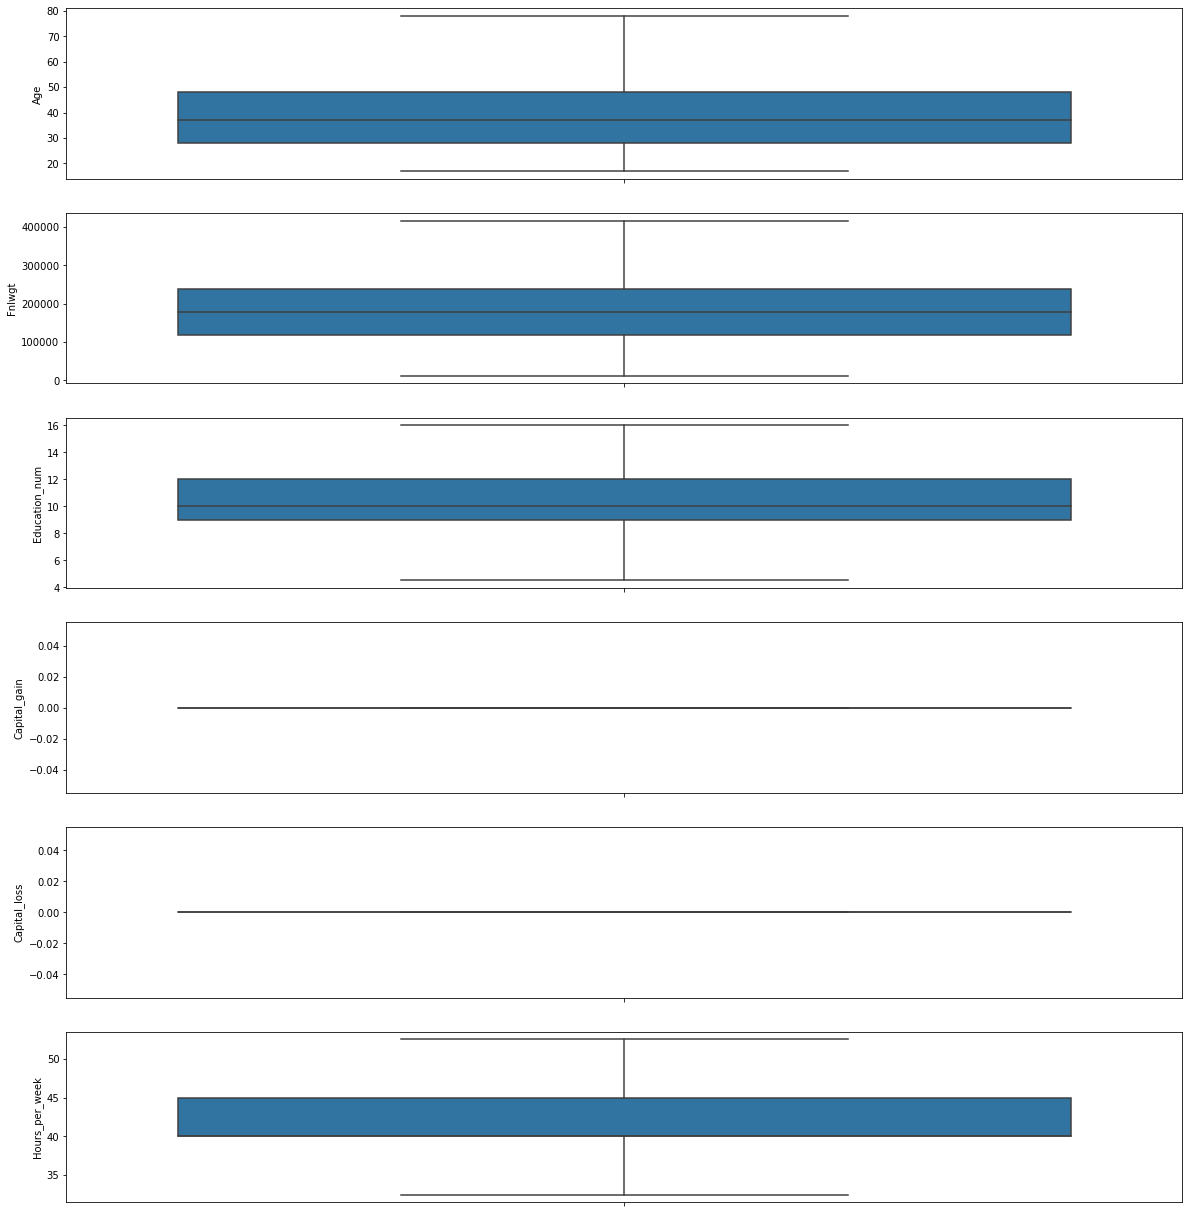

In [29]:

counter=1
plt.figure(figsize=(20,150))
columns = ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week']
counter=1;
for i in range(0,len(columns)):
        plt.subplot(40,1,counter)
        counter=counter+1
        sns.boxplot(y=columns[i],hue = columns[i],data=df)
        #sns.boxplot(df[columns[i]])

# Scaling the data

In [30]:
fin_df = df.drop(['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex','Native_country','Income','<=Income'],axis=1)
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(fin_df)
final_df = pd.DataFrame(minmax_df, columns = fin_df.columns)

# Removing Skewness

In [31]:
fin_df_new=power_transform(final_df)
fin_df_new = pd.DataFrame(fin_df_new,columns=final_df.columns)

# Confirming removal of skewness

In [32]:
fin_df_new.skew()

Age               0.027270
Fnlwgt            0.010588
Education_num    -0.000522
Capital_gain      0.000000
Capital_loss      0.000000
Hours_per_week    0.004877
dtype: float64

In [33]:
fin_df_new = fin_df_new.join(df['Workclass'])
fin_df_new = fin_df_new.join(df['Education'])
fin_df_new = fin_df_new.join(df['Marital_status'])
fin_df_new = fin_df_new.join(df['Occupation'])
fin_df_new = fin_df_new.join(df['Relationship'])
fin_df_new = fin_df_new.join(df['Race'])
fin_df_new = fin_df_new.join(df['Sex'])
fin_df_new = fin_df_new.join(df['Native_country'])
fin_df_new = fin_df_new.join(df['Income'])

# Train_Test_split

In [34]:
x = fin_df_new.drop(["Income"],axis=1)
y = fin_df_new["Income"]

In [35]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if(acc>maxAccu):
        maxAccu=acc
        maxRS=i
print("Best Accuracy is",maxAccu,"on Random State",maxRS)

Best Accuracy is 0.7858312858312858 on Random State 47


In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=47)

# SMOTE

In [37]:
print("Before OverSampling '1': {}".format(sum(y_train == 1)))
print("Before OverSampling '0': {} \n".format(sum(y_train == 0)))
  

sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print("After OverSampling '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling '0': {}".format(sum(y_train_res == 0)))

Before OverSampling '1': 5532
Before OverSampling '0': 17260 

After OverSampling '1': 17260
After OverSampling '0': 17260


# Model Building

------------Logistic Regression------------

In [38]:

LogReg = LogisticRegression(max_iter = 500)
LogReg.fit(x_train_res,y_train_res)
pred = LogReg.predict(x_test)
acc = classification_report(y_test, pred)
print(acc)

              precision    recall  f1-score   support

           0       0.92      0.73      0.82      7459
           1       0.48      0.79      0.60      2309

    accuracy                           0.75      9768
   macro avg       0.70      0.76      0.71      9768
weighted avg       0.81      0.75      0.76      9768



------------Decision tree------------

In [39]:

DTC = DecisionTreeClassifier()
DTC.fit(x_train_res,y_train_res)
pred = DTC.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      7459
           1       0.52      0.60      0.56      2309

    accuracy                           0.77      9768
   macro avg       0.69      0.71      0.70      9768
weighted avg       0.79      0.77      0.78      9768



------------Random Forest------------

In [40]:

RFC = RandomForestClassifier()
RFC.fit(x_train_res,y_train_res)
pred = RFC.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      7459
           1       0.60      0.67      0.63      2309

    accuracy                           0.82      9768
   macro avg       0.75      0.77      0.76      9768
weighted avg       0.82      0.82      0.82      9768



------------ Naive bayes------------

In [41]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train_res, y_train_res)
pred = gnb.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      7459
           1       0.49      0.80      0.61      2309

    accuracy                           0.76      9768
   macro avg       0.71      0.77      0.72      9768
weighted avg       0.82      0.76      0.77      9768



------------SVM------------

In [42]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, tol=1e-5)

clf.fit(x_train_res, y_train_res.ravel()) 
pred = clf.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      7459
           1       0.67      0.36      0.47      2309

    accuracy                           0.81      9768
   macro avg       0.75      0.65      0.68      9768
weighted avg       0.79      0.81      0.78      9768



# Cross Validation

In [43]:

print(cross_val_score(DTC,x,y,cv=5).mean())

0.7753071253071253


In [44]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8271805896805897


In [45]:
print(cross_val_score(LogReg,x,y,cv=5).mean())

0.8077395577395577


In [46]:
print(cross_val_score(gnb,x,y,cv=5).mean())

0.7823402948402949


In [47]:
print(cross_val_score(clf,x,y,cv=5).mean())

0.777027027027027


    Logistic Regression -> |0.75 - 0.80| = 0.05
    Decision Tree -> |0.77 - 0.77| = 0.00
    Random Forest -> |0.82 - 0.82| = 0.00
    Naive Bayes -> |0.76 - 0.78| = 0.02
    SVM -> |0.81 - 0.77| = 0.04
    
    We can see Random forest Classifier model is performing best. We will choose Random Forest model for the Hypertuning

# Hyper parameter tuning

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
parameter = {
 'max_depth': [100,300,600,800],
 'min_samples_split': [8, 10, 12],
 'min_samples_leaf': [1, 2, 4],
 'n_estimators': [100, 400, 600, 800]
    
}
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5)


In [50]:
GCV.fit(x_train_res,y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [100, 300, 600, 800],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 400, 600, 800]})

In [51]:
GCV.best_params_

{'max_depth': 600,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 800}

# Building final Model

In [52]:
Final_model = RandomForestClassifier(min_samples_leaf=1,max_depth=600,min_samples_split=8,n_estimators=800)
Final_model.fit(x_train_res,y_train_res)
pred = Final_model.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      7459
           1       0.60      0.72      0.66      2309

    accuracy                           0.82      9768
   macro avg       0.75      0.79      0.77      9768
weighted avg       0.84      0.82      0.83      9768



We can observe that precision,recall,f1score for 1 has improved after hypertuning

# AUC-ROC Curve

In [53]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

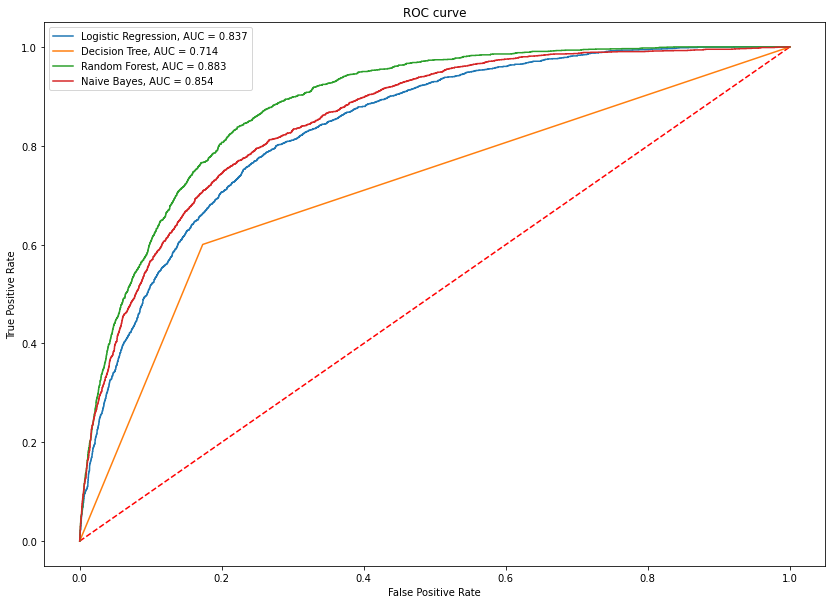

In [54]:

fig = plt.figure(figsize=(14,10))
plt.plot([0, 1], [0, 1],'r--')
#KNN

#Logistic Regression
preds_proba_lg = LogReg.predict_proba(x_test)
probslg = preds_proba_lg[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probslg)
auclg = roc_auc_score(y_test, probslg)
plt.plot(fpr, tpr, label=f'Logistic Regression, AUC = {str(round(auclg,3))}')

#Decision Tree Classifier
preds_proba_DTC = DTC.predict_proba(x_test)
probsDTC = preds_proba_DTC[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probsDTC)
aucDTC = roc_auc_score(y_test, probsDTC)
plt.plot(fpr, tpr, label=f'Decision Tree, AUC = {str(round(aucDTC,3))}')

#Random Forest
preds_proba_RFC = Final_model.predict_proba(x_test)
probsRFC = preds_proba_RFC[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probsRFC)
aucRFC = roc_auc_score(y_test, probsRFC)
plt.plot(fpr, tpr, label=f'Random Forest, AUC = {str(round(aucRFC,3))}')

#Naive Bayes
preds_proba_gnb = gnb.predict_proba(x_test)
probsgnb = preds_proba_gnb[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probsgnb)
aucgnb = roc_auc_score(y_test, probsgnb)
plt.plot(fpr, tpr, label=f'Naive Bayes, AUC = {str(round(aucgnb,3))}')

#SVM
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC curve")
plt.rcParams['axes.titlesize'] = 18
plt.legend()
plt.show()

We can observe that Random Forest is performing best with AUC score of 0.883

# Saving the model

In [55]:
import joblib
joblib.dump(Final_model,"Census_income.pkl")


['Census_income.pkl']